In [ ]:
# 6. Animal, Vegetable or Mineral 

## Datasets
  * Chester Beatty Library & Museum
  * V&A

## Libraries

  * Pandas
  * Tensorflow
  * Keras
    

The Chester Beatty Library has ... but what interests us for this example is fish, this is a game that has a long history, including with the V&A collections, as this [recording](https://www.bbc.co.uk/iplayer/episode/p017ggk3/animal-vegetable-mineral-011019) from the BBC television show of the same name from 1958 shows. Let's see if machine (learning) can do better on two collections of fish , one from the V&A, and one from the Chester... 

In [5]:
# From a search for fish - https://viewer.cbl.ie/viewer/search/-/SUPERDEFAULT%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BSUPERFULLTEXT%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BSUPERUGCTERMS%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BDEFAULT%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BFULLTEXT%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BNORMDATATERMS%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BUGCTERMS%253A%2528fish%2BAND%2Bsnuff%2529%2BOR%2BCMS_TEXT_ALL%253A%2528fish%2BAND%2Bsnuff%2529/1/-/-/
identifiers = [
    'C_0905',
    'C_0415',
    'C_0395',
    'C_0374',
    'C_0702',
    'C_0661',
    'C_0730',
    'C_0759',
    'C_0826'
]

base_url = 'https://viewer.cbl.ie/viewer/api/v1/records/'

In [6]:
import requests
import pandas as pd

chester_beatty_fish = []
for identifier in identifiers:
  # Request the IIIF Presentation API manifest  
  req = requests.get(f'{base_url}{identifier}/manifest')
  fish_json = req.json()
  thumbnail_url = ""
  if 'thumbnail' in fish_json:
    thumbnail_url = fish_json['thumbnail']['@id']
  metadata = {}
  # Feel there must be a better way of getting this 
  if 'metadata' in fish_json:
    for elem in fish_json['metadata']:
      metadata[elem['label']] = elem['value']

    chester_beatty_fish.append([metadata['Object no'], metadata['Title'], metadata['Description'], thumbnail_url])
    
chester_beatty_fish_df = pd.DataFrame(chester_beatty_fish, columns=['Object No', 'Title', 'Description', 'Thumbnail'])

chester_beatty_fish_df.head(10)

,Object No,Title,Description,Thumbnail
0,C 0905,Snuff bottle carved with immortal and fish,Quartz crystal snuff bottle carved with immort...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
1,C 0415,Snuff bottle carved with fan-tailed fish swimming,Glass snuff bottle in orange and red carved wi...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
2,C 0395,Snuff bottle in shape of fish,"Glass snuff bottle in red shaped like a fish, ...",https://viewer.cbl.ie/viewer/api/v1/records/C_...
3,C 0374,Snuff bottle in shape of twin fish,Porcelain snuff bottle in shape of twin fish u...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
4,C 0702,Snuff bottle carved with fish and lotus tendrils,Limestone (marble) or quartz snuff bottle carv...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
5,C 0661,Snuff bottle with inclusions resembling a fan-...,Dendritic chalcedony snuff bottle with inclusi...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
6,C 0730,Snuff bottle in shape of fish,"Nephrite snuff bottle in shape of fish, by an ...",https://viewer.cbl.ie/viewer/api/v1/records/C_...
7,C 0759,Snuff bottle in shape of fan-tailed fish,Quartz snuff bottle in shape of fan-tailed fis...,https://viewer.cbl.ie/viewer/api/v1/records/C_...
8,C 0826,Snuff bottle in shape of two fish,"Nephrite snuff bottle in shape of two fish, by...",https://viewer.cbl.ie/viewer/api/v1/records/C_...


## V&A Fish Snuff Bottles

In [149]:


tigers_vam_df = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?q=tiger&images_exist=true&page=1&response_format=csv')
tigers_vam_df.head(10)

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,2545(IS),O61949,Mechanical organ,Tippoo's Tiger,Mysore,Unknown,NaN,ca. 1790,2006AH4168,Wood,Carved,NaN,"South Asia, Room 41",False,False
1,IS.60-1968,O17513,A tiger hunt,A tiger-hunt,Punjab,Unknown,NaN,ca. 1892,2013GB2027,gouache,painted,Company,In store,False,False
2,FE.69-1997,O22243,Painting,Tiger and Magpie,Korea,Unknown,NaN,1850-1910,2006AN9581,ink,NaN,Chosŏn,In store,False,False
3,25016:756,O633830,Print,THE TIGER,Great Britain,"Whymper, Josiah Wood",artist,19th century,2010EC7466,paper,wood engraving,NaN,"Prints & Drawings Study Room, level E",False,False
4,B.251-2009,O1156216,Suitcase,Tipu the Tiger,England,"Law, Rob",designer,2009,2017KK4815,plastic,injection moulding,NaN,SWPREP,False,False
5,15607:3,O661487,Print,Head of a Tiger,London,"Fairland, Thomas",artist,10/1826,2010EC7505,paper,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
6,DYCE.904,O1140488,Drawing,A Tiger Hunt,England,"Stothard, Thomas",artist,mid 18th - early 19th century,2010EG4028,paper,drawing (image-making),English School,"Prints & Drawings Study Room, level H",False,False
7,S.2228-1994,O1162891,Poster,NaN,Bradford,W.E. Berry Ltd,printers (people),1936-1937,2020MR2037,printing ink,printing,NaN,In store,False,False
8,FE.68-1997,O22242,Painting,Tiger and Magpie,Korea,Unknown,NaN,1850-1910,2006AN9582,ink,NaN,Chosŏn,In store,False,False
9,IS.27-1977,O479147,Figure,figurine of a tiger,Chhota Udaipur,Punja Jetha (Kumhar),maker,1971-2,2020MU2411,terracotta,hand thrown,NaN,In store,False,False


## Image Classification

So, now we have our two datasets, lets see which, according to a very simplistic machine learning model has the most 'realistic' fish

First we need to build the model, using the dataset from [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html)


In [2]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="coarse")


In [147]:
import autokeras as ak

clf2 = ak.ImageClassifier(max_trials=2)
clf2.fit(X_train, y_train, epochs=5)

INFO:tensorflow:Reloading Oracle from existing project ./image_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./image_classifier/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
1563/1563 [==============================] - 60s 38ms/step - loss: 2.4003 - accuracy: 0.2675
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8934 - accuracy: 0.4180
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.7442 - accuracy: 0.4638
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6424 - accuracy: 0.4914
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5624 - accuracy: 0.5114
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [128]:
from PIL import Image
from keras.preprocessing import image
import requests

# Workaround for memory image import as per https://github.com/keras-team/keras/issues/11684

chester_beatty_fishes = []

for index,fish in chester_beatty_fish_df.iterrows():
  response = requests.get(fish['Thumbnail'], stream=True)
  img_array = None
  img = Image.open(response.raw)
  img = img.convert('RGB')
  img = img.resize((32,32), Image.NEAREST)
  img_array = image.img_to_array(img)
  chester_beatty_fishes.append(img_array)
    
chester_beatty_fishes_array = np.array(chester_beatty_fishes)

In [143]:
chester_beatty_fishes_array[0].shape

(32, 32, 3)

In [72]:
cifar100_broad_classes = [
'aquatic mammals',
'fish' ,
'flowers',
'food containers' ,
'fruit and vegetables', 
'household electrical devices' ,
'household furniture' ,
'insects',
'large carnivores' ,
'large man-made outdoor things',
'large natural outdoor scenes' ,
'large omnivores and herbivores' ,
'medium-sized mammals' ,
'non-insect invertebrates' ,
'people' ,
'reptiles',
'small mammals' ,
'trees',
'vehicles 1' ,
'vehicles 2']

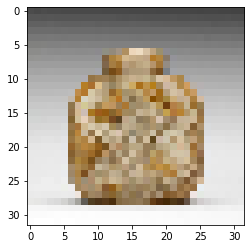

In [94]:
imgplot = plt.imshow(array_to_img(chester_beatty_fishes[4]))
plt.show()

In [148]:
import numpy as np
#input_arr = np.array([img_array])  # Convert single image to a batch.
#predictions = clf2.predict(np.array([img_array]))

for fish_index in range(0, chester_beatty_fishes_array.shape[0]):
#  predictions = clf2.predict(np.array([fish_img[0]]))
  predictions = clf2.predict(np.array([chester_beatty_fishes_array[0]]))
  print(f"Object has class {cifar100_broad_classes[int(predictions[0][0])]}")

Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers
Object has class food containers


In [83]:
cifar100_broad_classes[int(predictions[0][0])]

'small mammals'

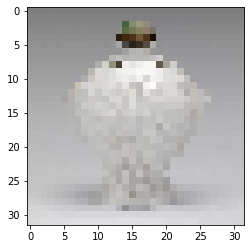

In [39]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

# Visualizing the data
#fig, ax = plt.subplots(nrows=2, ncols=1)
#index = 0
#for row in ax:
#    for col in row:
        #col.set_title(cifar10_labels_dict[y_train[index][0]])

imgplot = plt.imshow(array_to_img(img_array))
plt.show()
